# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.003
-0.003
-0.003
-0.003
0.0
-0.002
-0.003
-0.002
0.98
0.983
0.982
1.965
1.967
1.969
1.969
1.968
2.978
2.98
2.981
2.983
2.976
3.977
3.979
3.979
3.979
3.979
4.989
4.991
4.992
4.992
4.992
5.974
5.976
5.977
5.977
5.978
6.96
6.962
6.964
6.964
7.461
7.464
7.465
7.964
7.966
7.966
7.965
7.966
8.955
8.956
8.959
8.958
8.958
9.952
9.953
9.952
9.951
10.942
10.945
10.947
10.946
10.947
11.935
11.934
11.936
12.929
12.93
12.93
12.93
12.93
13.918
13.921
13.922
13.921
13.922
14.639
14.642
14.643
14.643
14.644
15.364
15.367
15.368
15.367
15.367
16.35
16.352
16.353
16.353
16.352
17.334
17.337
17.338
17.338
17.337
18.325
18.325
18.325
18.324
19.312
19.312
19.311
19.311
20.296
20.296
20.295
20.295
21.281
21.281
21.281
21.953
21.953
21.951
21.952
22.622
22.622
22.621
22.62
23.636
23.635
23.634
23.634
24.624
24.624
24.622
24.622
25.607

56.926
56.926
56.926
56.926
56.926
56.926
56.926
56.926
56.925
56.925
56.926
56.926
56.958
57.134
57.134
57.146
57.159
57.148
57.149
57.151
57.141
57.14
57.14
57.14
57.144
57.176
57.177
57.176
57.175
57.175
57.175
57.175
57.175
57.175
57.175
57.174
57.174
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.173
57.172
57.171
57.171
57.17
57.169
57.209
57.249
57.249
57.29
57.323
57.323
57.323
57.323
57.322
57.322
57.322
57.322
57.321
57.321
57.321
57.321
57.321
57.321
57.321
57.32
57.321
57.322
57.321
57.321
57.32
57.32
57.32
57.32
57.32
57.32
57.319
57.319
57.319
57.319
57.319
57.319
57.319
57.318
57.318
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.317
57.316
57.316
57.317
57.316
57.349
57.387
57.42
57.42
57.42
57.42
57.42
57.454
57.454
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.453
57.452
57.451
57.451
57.451
57.451
57.45
57.45
57.4

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1545,3090,59.516
1546,3092,59.516
1547,3094,59.516
1548,3096,59.516


<IPython.core.display.Javascript object>


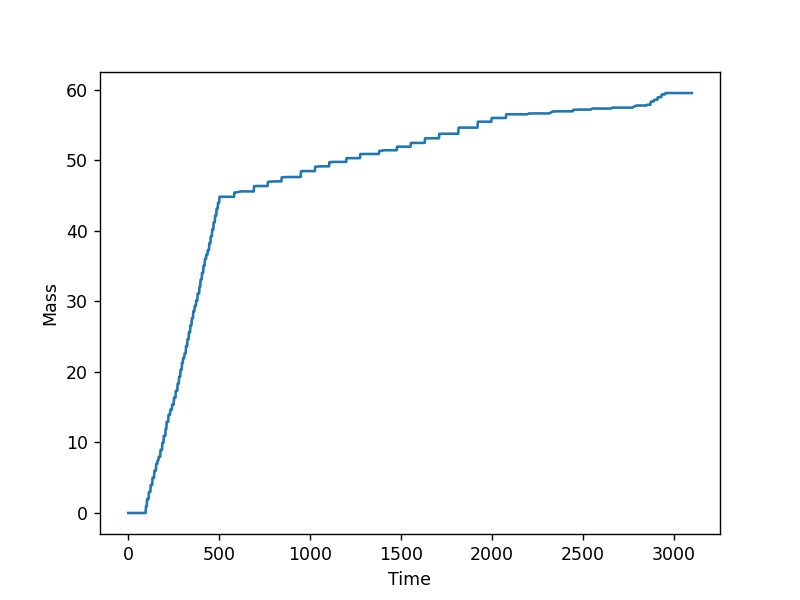

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_290823_S781-786.csv')